In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns


Loading the dataset


In [ ]:
from google.colab import files
uploaded=files.upload()


Saving hospital_dataset.csv to hospital_dataset (1).csv


In [ ]:
data=pd.read_csv("hospital_dataset.csv")
print(data.head(5))

           Hospital_Name Hospital_Location Patient_Name  Patient_Age  \
0       Sunrise Hospital                UK      Jack A.           88   
1          City Hospital             India     David B.           27   
2  Global Medical Center           Germany    Hannah A.           47   
3  Global Medical Center           Germany    Hannah C.           49   
4         Metro Hospital               USA     Grace A.           33   

   Heart_Patient  Diabetes_Patient  Kidney_Patient  Brain_Disease  \
0              0                 1               0              1   
1              1                 1               0              1   
2              1                 1               1              0   
3              1                 0               1              0   
4              1                 0               1              1   

   Lung_Disease   Test_Result  Viral_Affected Doctor_Name  Doctor_Age  \
0             0      Abnormal               0     Dr. Lee          38   
1     

Listing the top hospitals based on the rating


In [ ]:
data.info()
top_hosp = data[data["Hospital_Rating"] > 4.5]
print(top_hosp[["Hospital_Name", "Hospital_Location"]])


            Hospital_Name Hospital_Location
13       Sunrise Hospital           Germany
19  Global Medical Center           Germany
21         Metro Hospital           Germany
47       Sunrise Hospital           Germany
58        HealthCare Plus             India
66        HealthCare Plus             India
68       Sunrise Hospital           Germany
69       Sunrise Hospital             India
70         Metro Hospital             India
72       Sunrise Hospital           Germany
79       Sunrise Hospital            Canada
80        HealthCare Plus            Canada
81       Sunrise Hospital            Canada
82       Sunrise Hospital                UK
84       Sunrise Hospital                UK
94        HealthCare Plus            Canada


Data Visualization


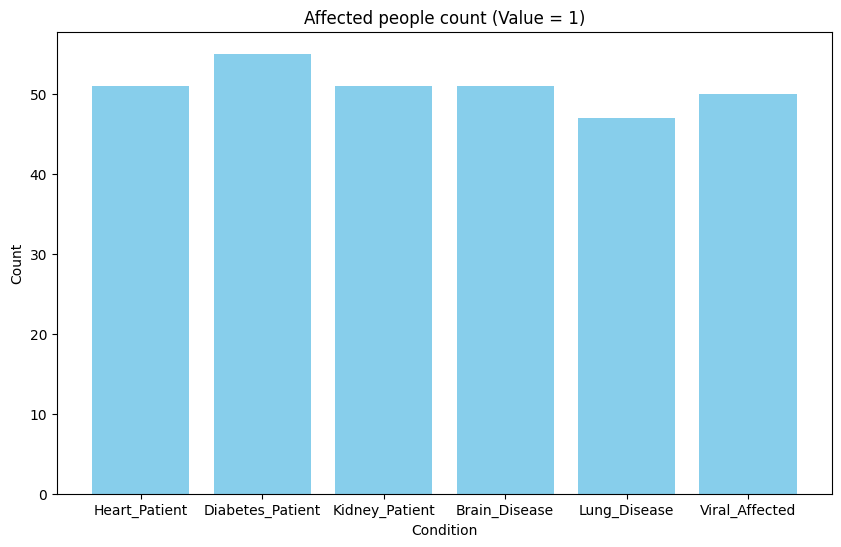

In [ ]:

columns_to_count = [
    "Heart_Patient",
    "Diabetes_Patient",
    "Kidney_Patient",
    "Brain_Disease",
    "Lung_Disease",
    "Viral_Affected"
]
counts = {col: (data[col] == 1).sum() for col in columns_to_count}
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.title('Affected people count (Value = 1)')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()


Proportion of people affected by virus


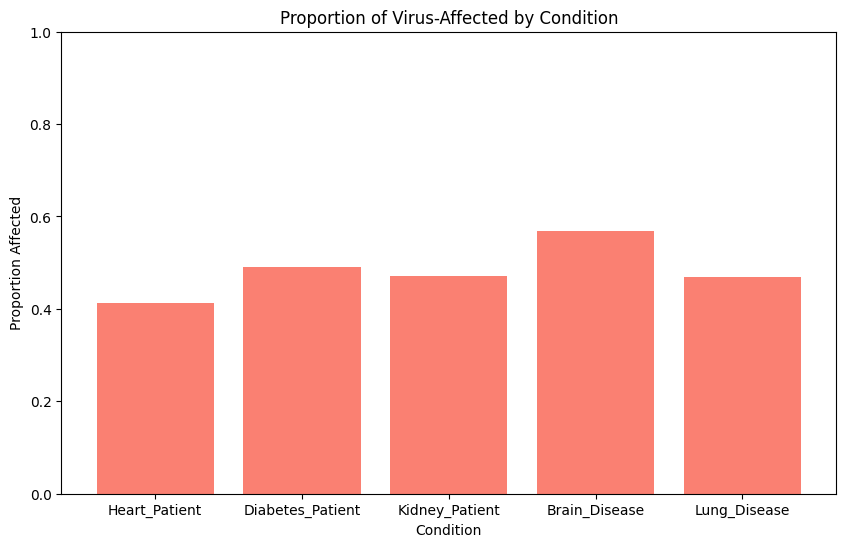

In [ ]:

conditions = [
    "Heart_Patient",
    "Diabetes_Patient",
    "Kidney_Patient",
    "Brain_Disease",
    "Lung_Disease"
]

proportions = {}
for condition in conditions:
    affected = data[(data[condition] == 1) & (data["Viral_Affected"] == 1)].shape[0]
    total = (data[condition] == 1).sum()
    proportions[condition] = affected / total if total > 0 else 0
plt.figure(figsize=(10, 6))
plt.bar(proportions.keys(), proportions.values(), color='salmon')
plt.title('Proportion of Virus-Affected by Condition')
plt.xlabel('Condition')
plt.ylabel('Proportion Affected')
plt.ylim(0, 1)
plt.show()


Sorting patients based on the age group

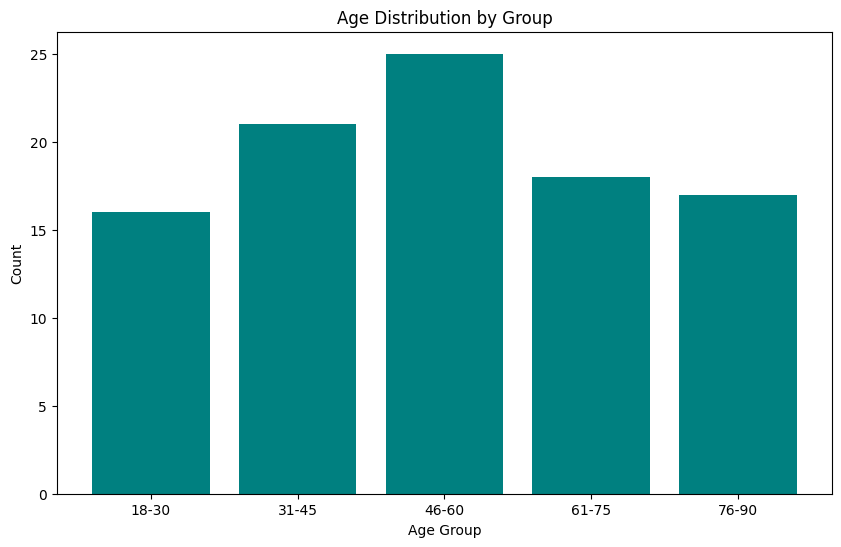

In [ ]:

age_bins = [18, 30, 45, 60, 75, 90]
age_labels = ['18-30', '31-45', '46-60', '61-75', '76-90']

data['Age_Group'] = pd.cut(data['Patient_Age'], bins=age_bins, labels=age_labels, right=True)
age_group_counts = data['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts.values, color='teal')
plt.title('Age Distribution by Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


Sort virally affected people based on their age


In [ ]:
virally_affected = data[data["Viral_Affected"] == 1]
sorted_affected = virally_affected.sort_values(by="Patient_Age")
print(sorted_affected[["Patient_Name", "Patient_Age"]])


   Patient_Name  Patient_Age
8    Charlie B.           18
43    Hannah D.           18
34     David A.           22
11   Charlie B.           24
31    Hannah A.           24
5      David D.           25
30   Charlie C.           27
36   Charlie C.           30
91     Alice B.           30
60      Jack C.           32
37    Hannah B.           34
54     Grace D.           34
99       Bob B.           34
87      Jack A.           34
90       Bob C.           34
17     Alice B.           35
15       Bob A.           35
12    Hannah D.           38
44     David B.           40
71      Jack C.           40
35   Charlie A.           43
85     Grace A.           43
2     Hannah A.           47
83     Frank A.           50
95      Emma A.           52
68     Frank C.           55
32     Grace D.           57
21     David D.           57
25      Jack D.           57
41       Bob C.           58
61      Jack B.           58
96   Charlie A.           59
78     David B.           59
33     Frank B

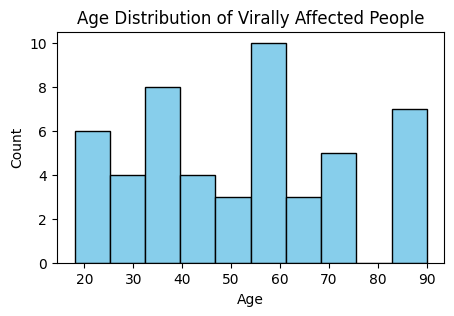

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(virally_affected["Patient_Age"], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Virally Affected People')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Doctors detail

   Doctor_Name  Doctor_Salary
3    Dr. Patel         199663
65   Dr. White         199404
9    Dr. Adams         199271
24     Dr. Lee         198982
12   Dr. White         198566
..         ...            ...
5    Dr. Kumar          78028
17     Dr. Lee          76381
6    Dr. White          75424
76     Dr. Lee          74829
46   Dr. Kumar          73077

[100 rows x 2 columns]


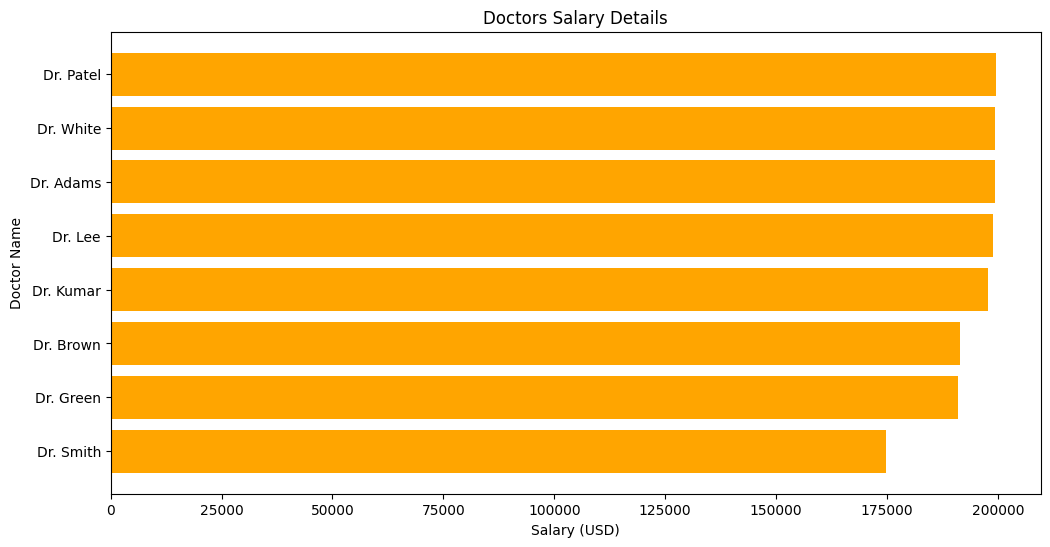

In [ ]:
salary_data = data[["Doctor_Name", "Doctor_Salary"]].sort_values(by="Doctor_Salary", ascending=False)
print(salary_data)

plt.figure(figsize=(12, 6))
plt.barh(salary_data["Doctor_Name"], salary_data["Doctor_Salary"], color='orange')
plt.title('Doctors Salary Details')
plt.xlabel('Salary (USD)')
plt.ylabel('Doctor Name')
plt.gca().invert_yaxis()
plt.show()

using ml

In [ ]:
X = data[["Patient_Age", "Heart_Patient", "Diabetes_Patient", "Kidney_Patient", "Brain_Disease", "Lung_Disease"]]
y = data["Viral_Affected"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}


In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.57      0.55      0.55        20


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.46      0.67      0.55         9

    accuracy                           0.50        20
   macro

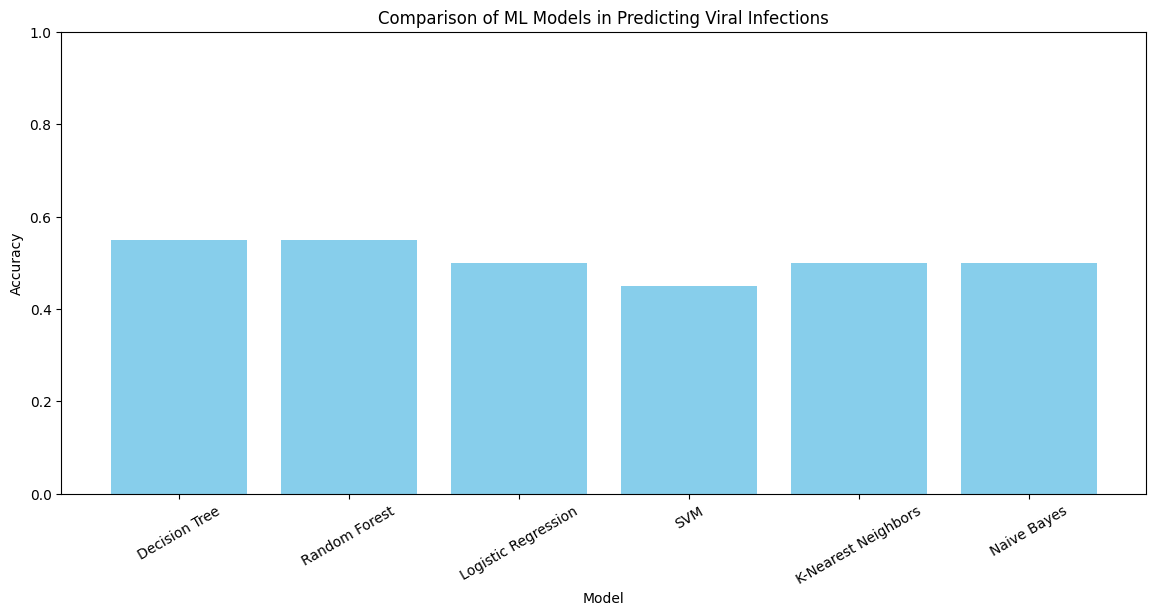

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Comparison of ML Models in Predicting Viral Infections')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()

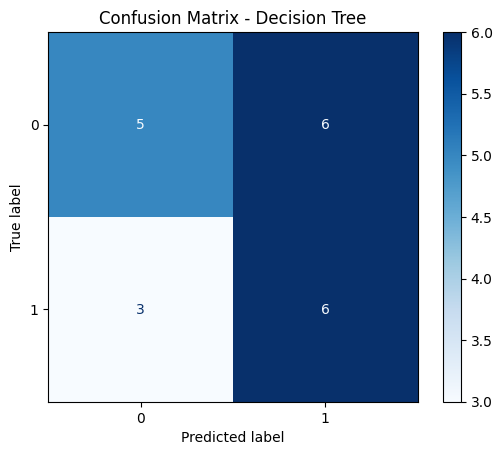

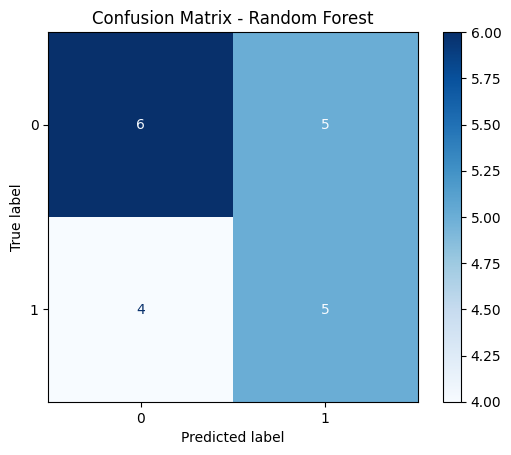

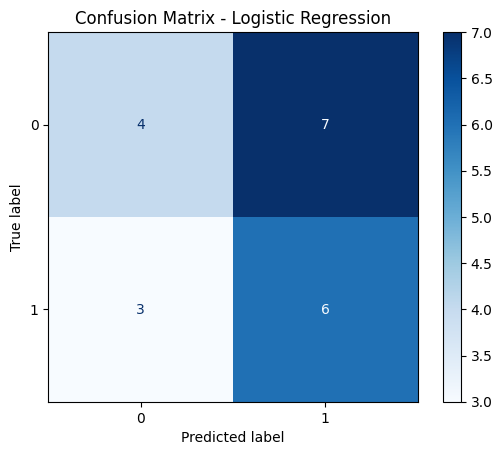

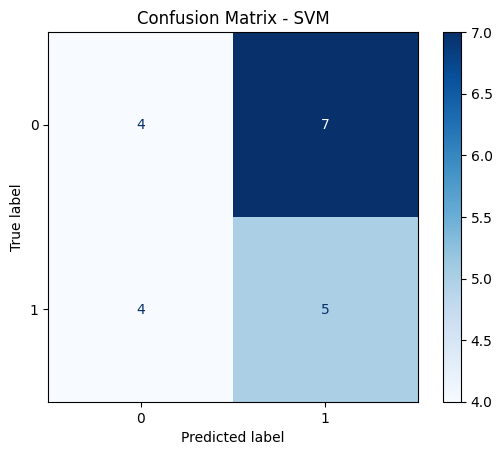

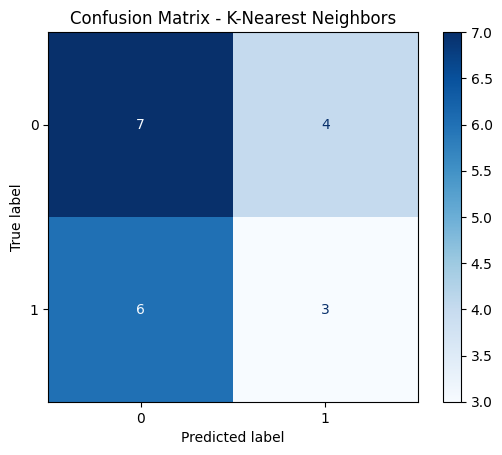

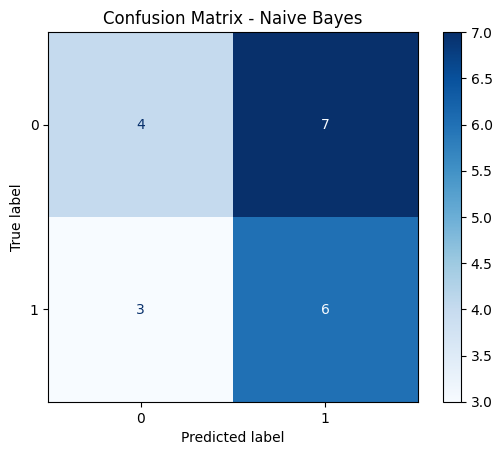

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

detailed_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    detailed_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()




In [ ]:
print("\nDetailed Comparison of ML Models:")
result_df = pd.DataFrame(detailed_results).T
print(result_df)


Detailed Comparison of ML Models:
                     Accuracy  Precision    Recall  F1-Score
Decision Tree            0.55   0.500000  0.666667  0.571429
Random Forest            0.55   0.500000  0.555556  0.526316
Logistic Regression      0.50   0.461538  0.666667  0.545455
SVM                      0.45   0.416667  0.555556  0.476190
K-Nearest Neighbors      0.50   0.428571  0.333333  0.375000
Naive Bayes              0.50   0.461538  0.666667  0.545455


In [ ]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
print(correlation_matrix['Viral_Affected'].sort_values(ascending=False))


Viral_Affected      1.000000
Brain_Disease       0.140028
Diabetes_Patient   -0.020101
Patient_Age        -0.022352
Doctor_Age         -0.028526
Doctor_Salary      -0.036175
Treatment_Cost     -0.047055
Kidney_Patient     -0.060012
Lung_Disease       -0.060108
Heart_Patient      -0.180036
Hospital_Rating    -0.245968
Name: Viral_Affected, dtype: float64
